# Student Grades Prediction

### Project Description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades Columns Description- total 43 columns -Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years.

In [1]:
# Analyse and Manipulate Data
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessor
from sklearn.preprocessing import StandardScaler

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Regressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import pickle

# Prevent WARNINGS!
import warnings
warnings.filterwarnings("ignore")

### Import & Analyse Data

In [3]:
df = pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


### Data Inspection

In [4]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [5]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193
570,CS-97571,C,D,D,C,C,D+,B,C+,C,...,C+,C,B-,D,F,C-,B+,D,C-,1.753


In [6]:
# Dimension of data

print("Dataset contain {0} rows & {1} columns".format(df.shape[0],df.shape[1]))


Dataset contain 571 rows & 43 columns


In [7]:
# Name of the columns
print("Columns/Variables we have in our dataset are:\n\n",df.columns)

Columns/Variables we have in our dataset are:

 Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


In [8]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [9]:
# Datatypes of the columns
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [10]:
#renaming two columns for our convenience
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

Observations:

We can clearly see that in the dataset there are 43 columns and 571 rows.

Renamed two columns for our convenience

We have two types of datatypes(object and float) present in out dataset.

As we can clearly see that all the columns in our dataset has object values except CGPA column which is our target/label.

Memory usage: 191.9+ KB

### Duplicate & Missing Values

In [11]:
#Checking for Duplicate Values
print("We have {} duplicated values in our dataframe".format(df.duplicated().sum()))


We have 0 duplicated values in our dataframe


In [12]:
#checking for missing Values

#Checking Null Values
df.isnull().sum().sum()

425

In [13]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105       1
MT-111       2
CS-105       0
CS-106       2
EL-102       2
EE-119       2
ME-107       2
CS-107       2
HS-205       5
MT-222       5
EE-222       7
MT-224       7
CS-210       7
CS-211       5
CS-203       5
CS-214       6
EE-217       6
CS-212       6
CS-215       6
MT-331       9
EF-303      10
HS-304      10
CS-301      10
CS-302      10
TC-383      10
MT-442      10
EL-332       9
CS-318       9
CS-306       9
CS-312      10
CS-317      12
CS-403      12
CS-421      12
CS-406      85
CS-414      13
CS-419      13
CS-423      14
CS-412      79
CGPA         0
dtype: int64

### Handling Missing Values

In [15]:
def replace_null_with_mode(df):
    # Find columns with null values
    columns_with_null = df.columns[df.isnull().any()]

    # Iterate over columns with null values
    for column in columns_with_null:
        # Calculate mode
        mode_value = df[column].mode()[0]

        # Replace null values with mode
        df[column].fillna(mode_value, inplace=True)

    return df

In [16]:
df= replace_null_with_mode(df)
df

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [17]:
#Checking Null values
df.isnull().sum()

Seat No.    0
PH-121      0
HS-101      0
CY-105      0
HS-105      0
MT-111      0
CS-105      0
CS-106      0
EL-102      0
EE-119      0
ME-107      0
CS-107      0
HS-205      0
MT-222      0
EE-222      0
MT-224      0
CS-210      0
CS-211      0
CS-203      0
CS-214      0
EE-217      0
CS-212      0
CS-215      0
MT-331      0
EF-303      0
HS-304      0
CS-301      0
CS-302      0
TC-383      0
MT-442      0
EL-332      0
CS-318      0
CS-306      0
CS-312      0
CS-317      0
CS-403      0
CS-421      0
CS-406      0
CS-414      0
CS-419      0
CS-423      0
CS-412      0
CGPA        0
dtype: int64

<AxesSubplot:>

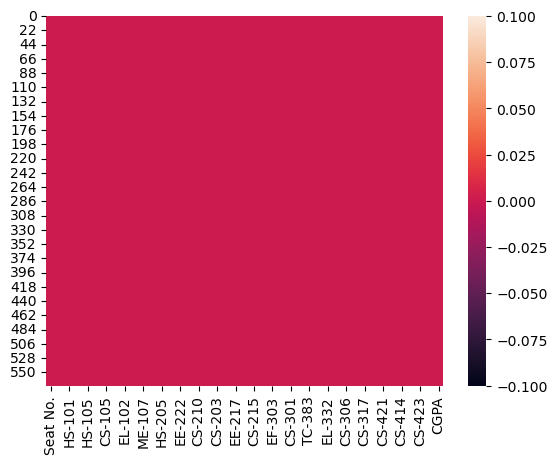

In [18]:
#Visualizing null values
sns.heatmap(df.isnull())

Observations:

Duplicate Values Our dataset does not contain any duplicate values.

Missing Values: There are a total of 425 missing values distributed across various columns. And we have filled those missing values with mode values.So now we dont have any missing values in our dataframe.

In [19]:
# checking value counts 
for i in df.columns:
    print(df[i].value_counts())

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105, dtype: int64
A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-  

In [20]:
#Removing some inconsistent grades
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)
df.reset_index(drop=True,inplace=True)

Observations:
    
We have checked the unique values in our dataframe for each column, found some inconsistent grades.

We have removed those inconsistent grades from the DataFrame.

### Statistical Summary

In [22]:
df.describe(include="object").T

,count,unique,top,freq
Seat No.,547,547,CS-97001,1
PH-121,547,12,A-,112
HS-101,547,12,A-,80
CY-105,547,11,A,174
HS-105,547,11,A,95
MT-111,547,12,A-,105
CS-105,547,11,A,148
CS-106,547,11,A-,113
EL-102,547,11,A-,103
EE-119,547,11,A-,134


Observations:

"Seat No.": This column contains 547 unique values, indicating that there are 547 distinct seat numbers in the dataset. The most frequent seat number is "CS-97001," which appears once.

"PH-121": There are 12 unique values in this column. The most common value is "A-" with a frequency of 112.

"HS-101": Similar to "PH-121," there are 12 unique values, and "A-" is the most frequent value with a frequency of 80.

"CY-105" and "HS-105": These columns both have 11 unique values, and "A" is the most common value in both, with frequencies of 174 and 95, respectively.

"MT-111," "CS-105," "CS-106," "EL-102," "EE-119," "ME-107," "CS-107," "HS-205," "MT-222," "EE-222," "MT-224," "CS-210," "CS-211," "CS-203," "CS-214," "EE-217," "CS-212," and "CS-215": Each of these columns has 11 or 12 unique values, and "A-" is the most frequent value in most of them.

"MT-331" and "HS-304": These columns both have 12 unique values, and "A" is the most common value in both, with frequencies of 118 and 130, respectively.

"EF-303," "CS-301," and "CS-302": These columns have 11 or 12 unique values, and "A-" is the most common value in each of them.

"TC-383," "MT-442," "EL-332," "CS-318," "CS-306," "CS-312," "CS-317," "CS-403," "CS-421," "CS-406," "CS-414," "CS-419," and "CS-423": Each of these columns has 11 or 12 unique values, and various grades are the most common values in them.

Overall, it appears that the dataset contains information related to courses, seat numbers, and grades. The grades are categorized with varying frequencies in different columns.

### Visiualizing it

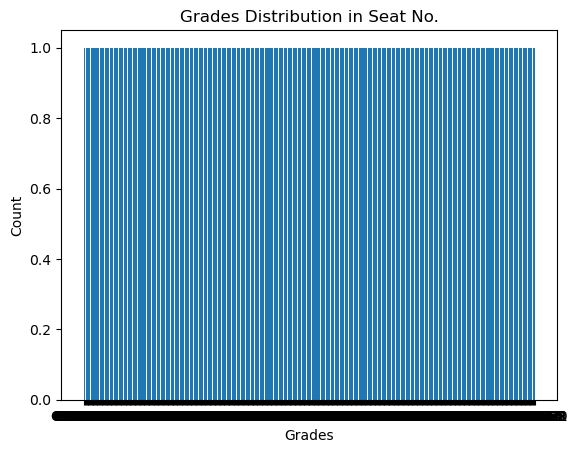

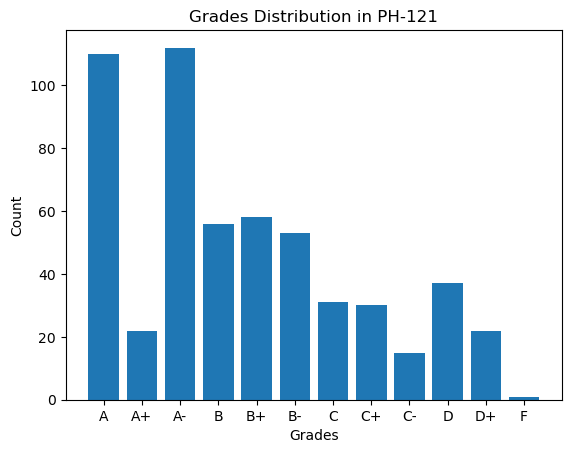

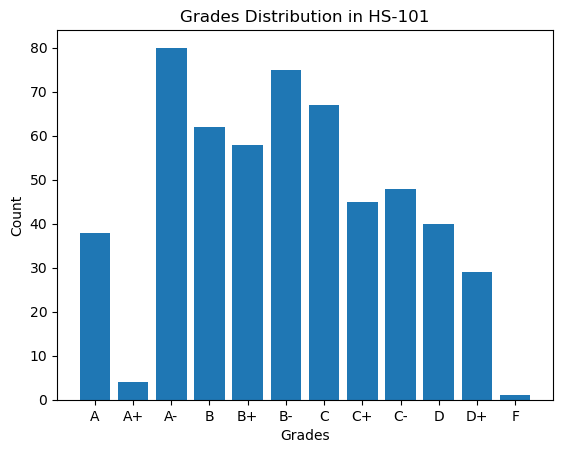

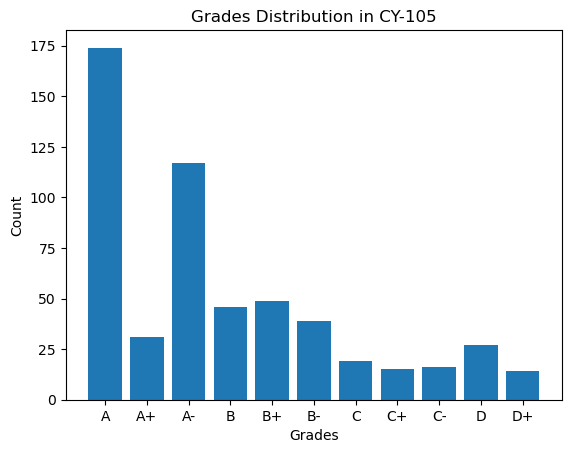

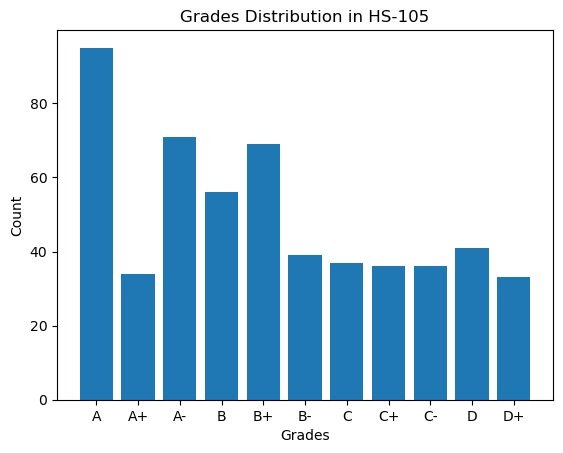

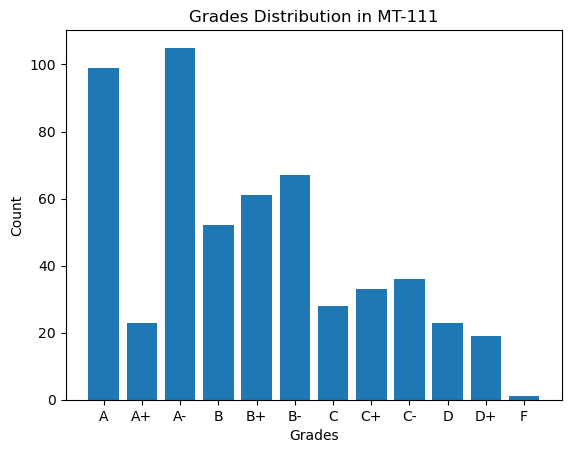

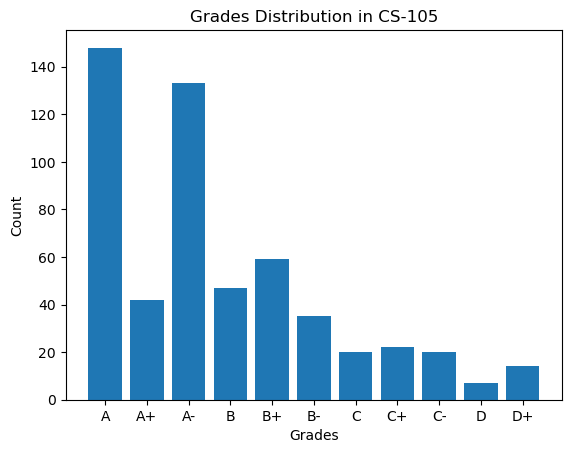

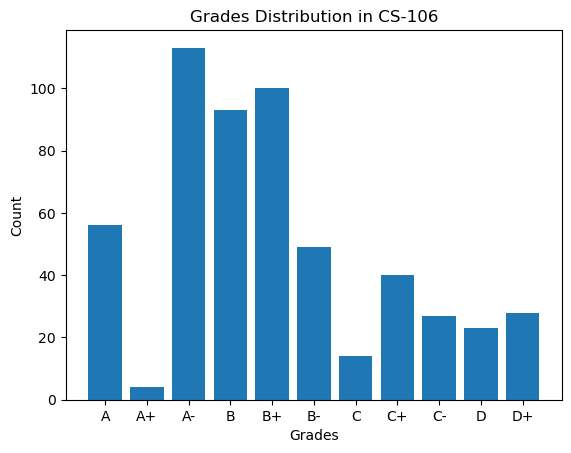

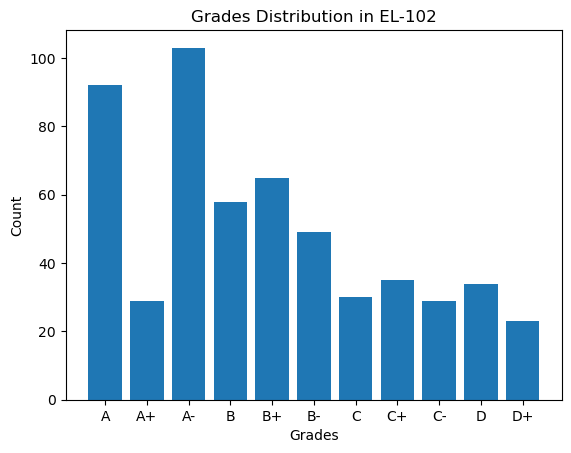

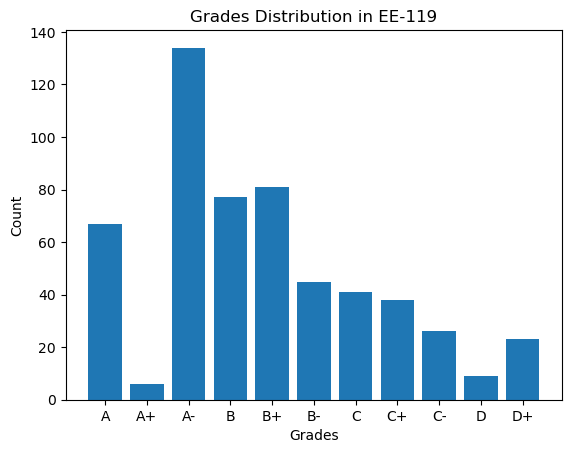

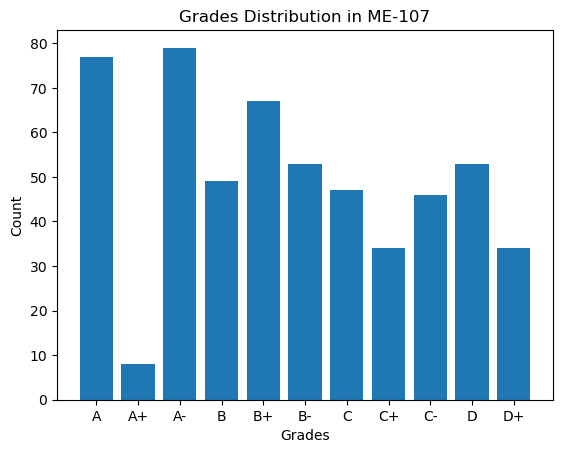

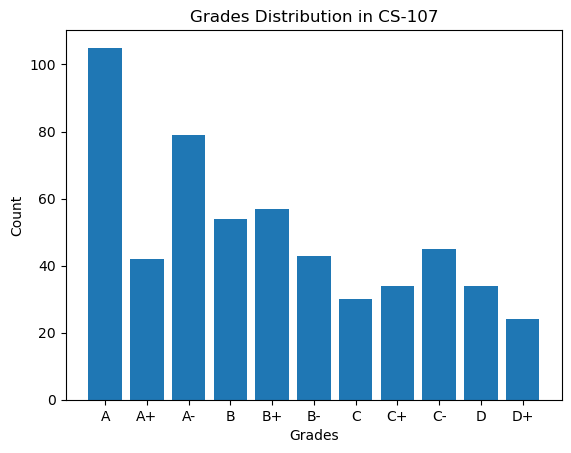

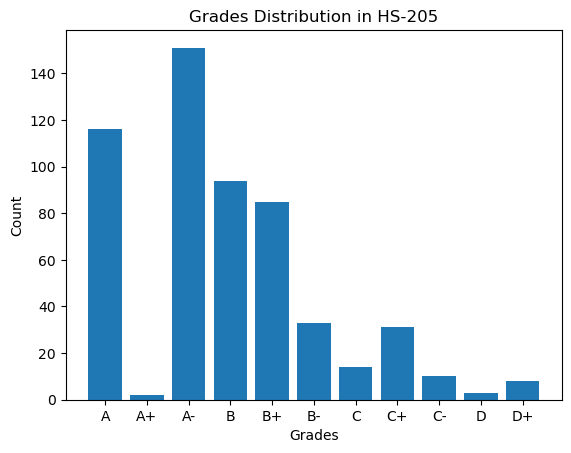

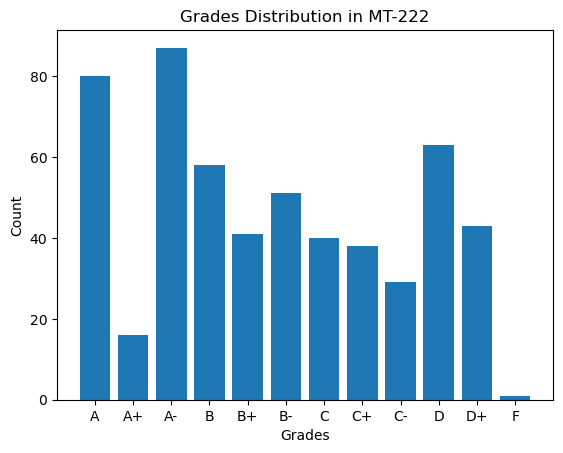

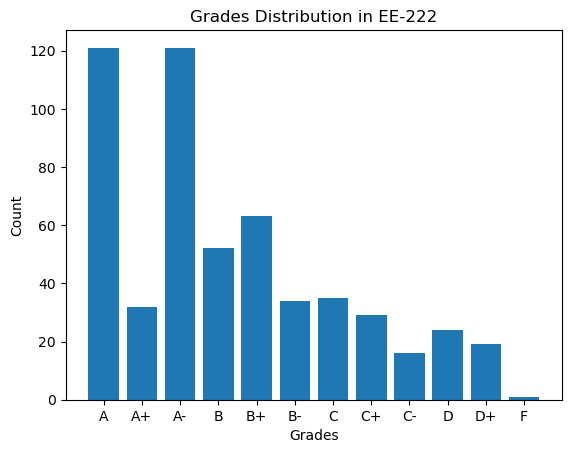

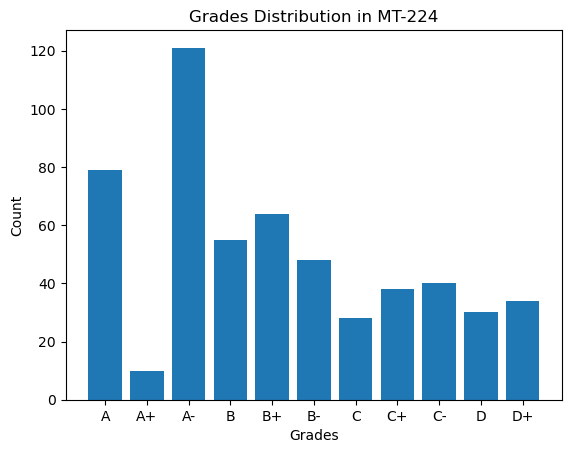

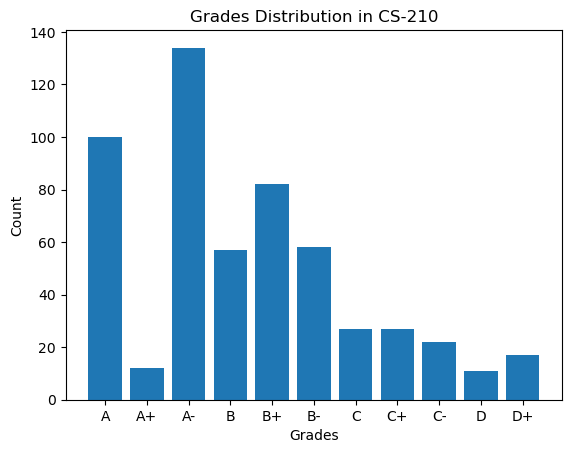

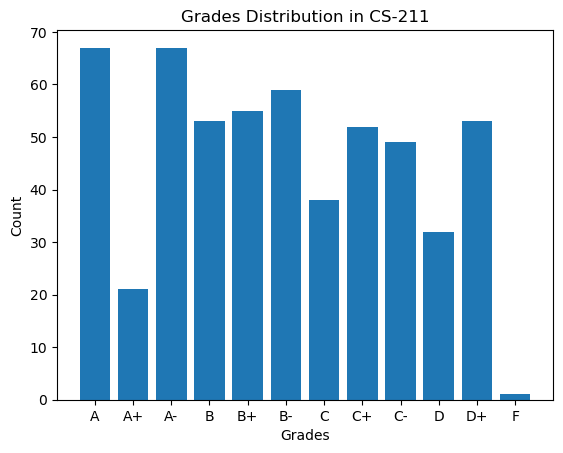

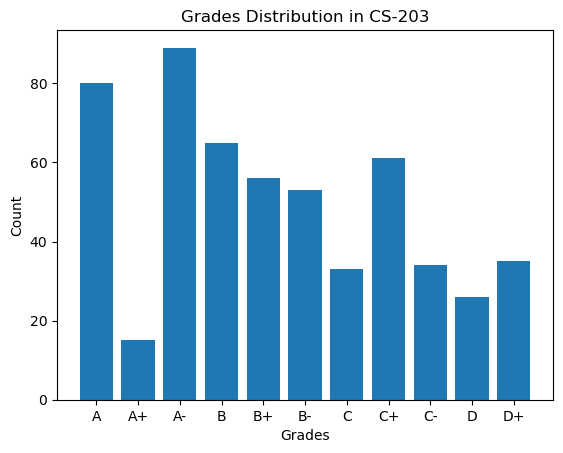

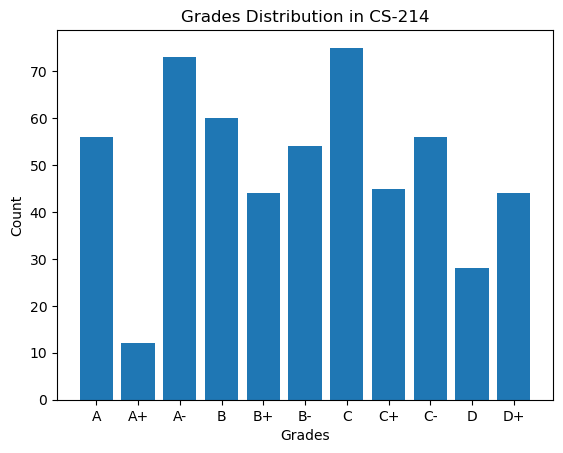

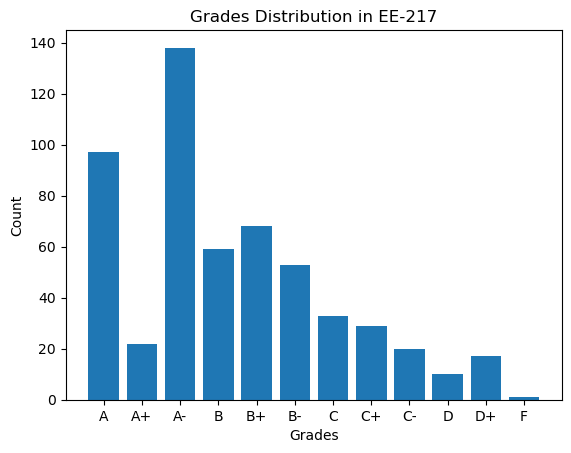

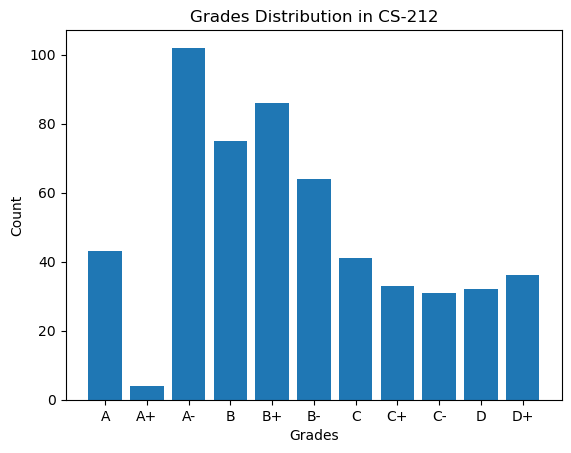

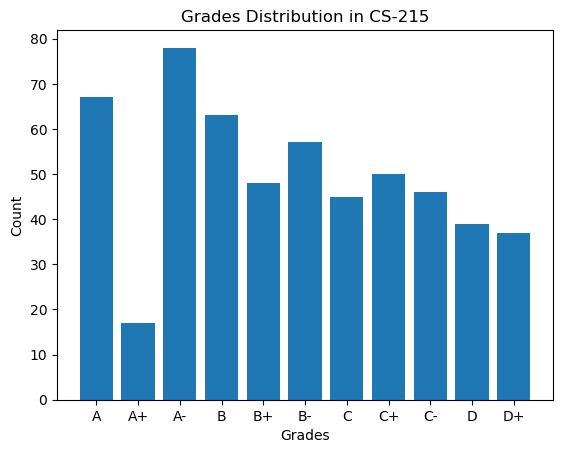

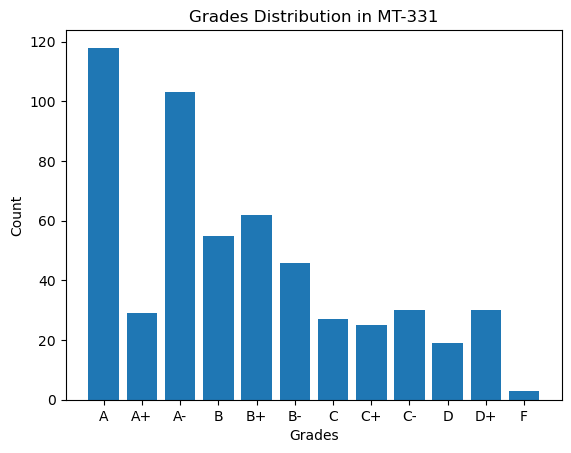

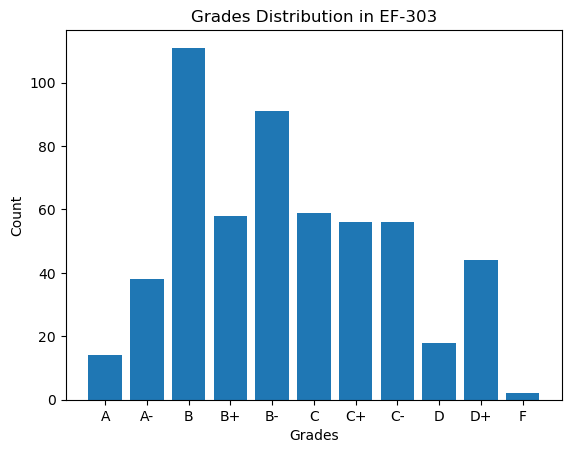

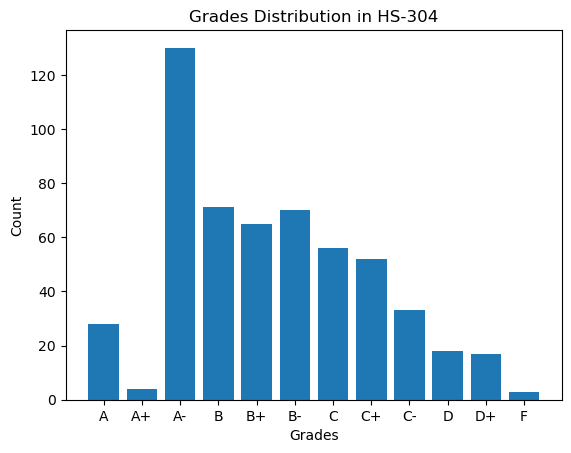

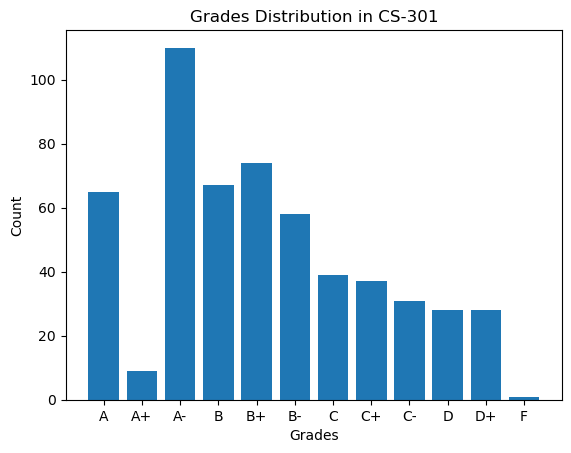

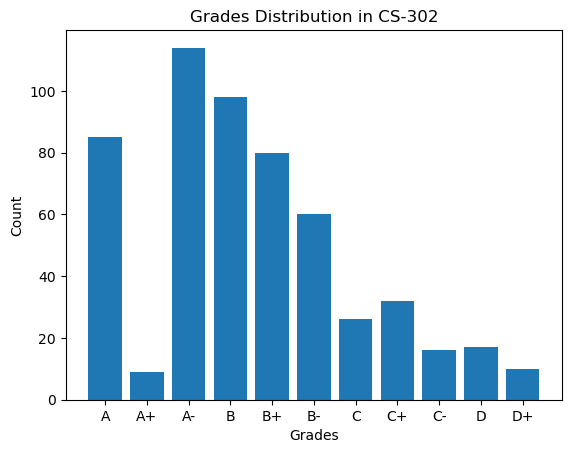

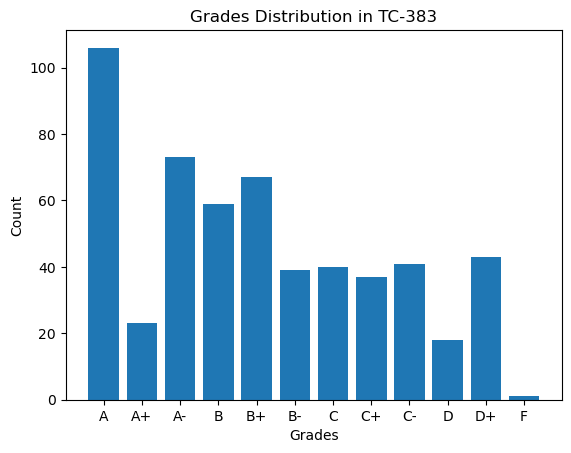

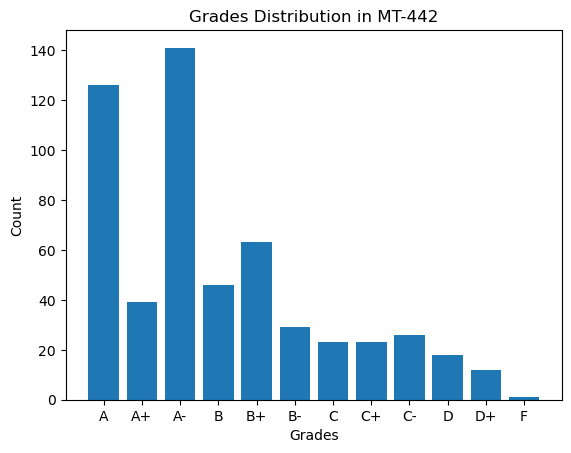

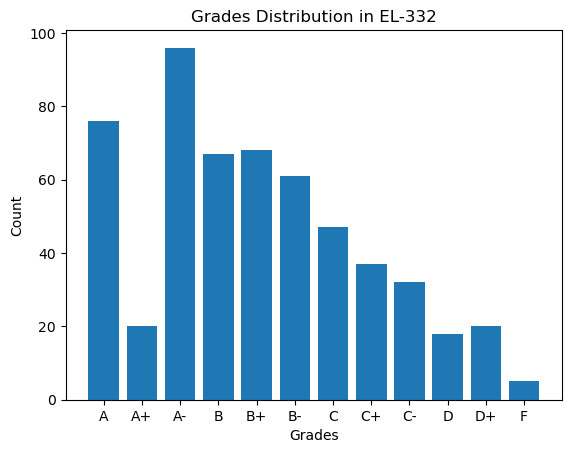

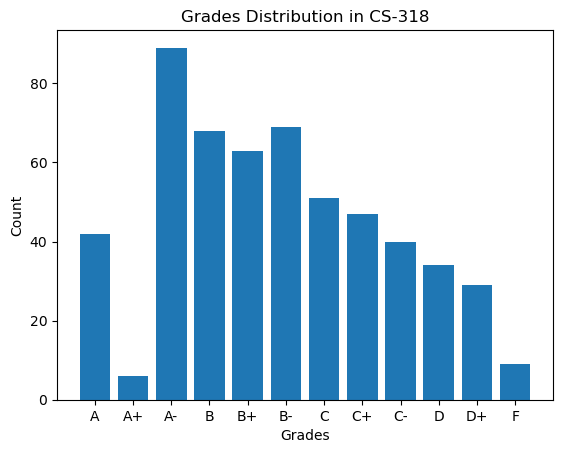

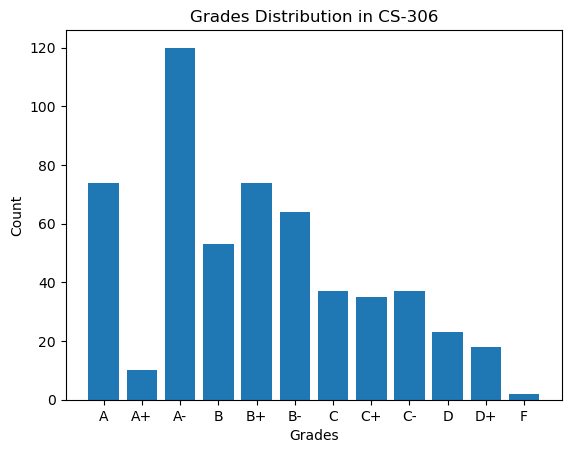

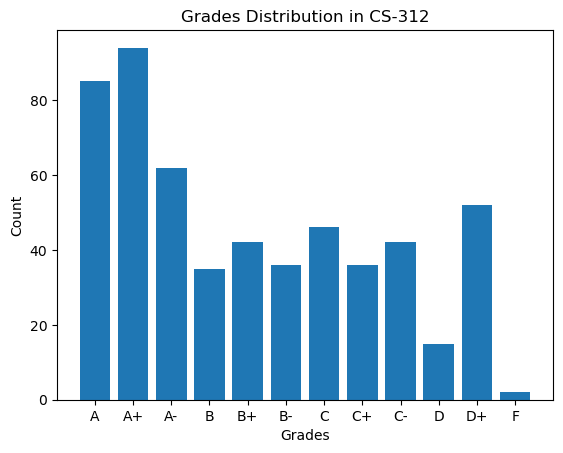

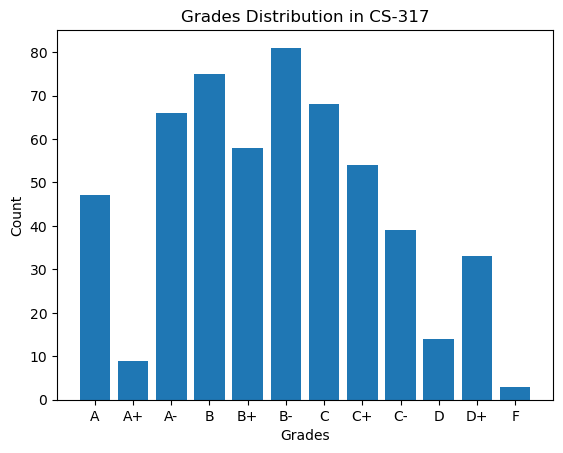

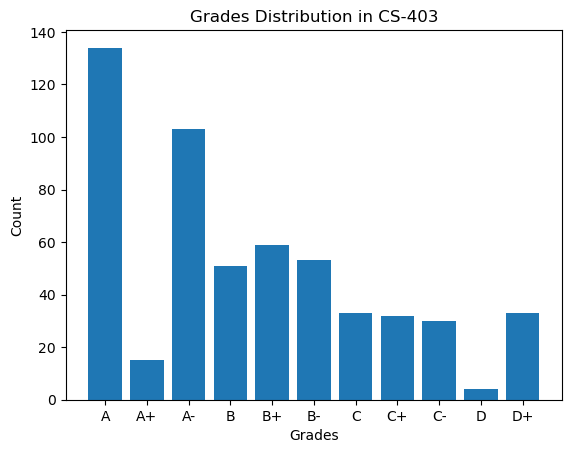

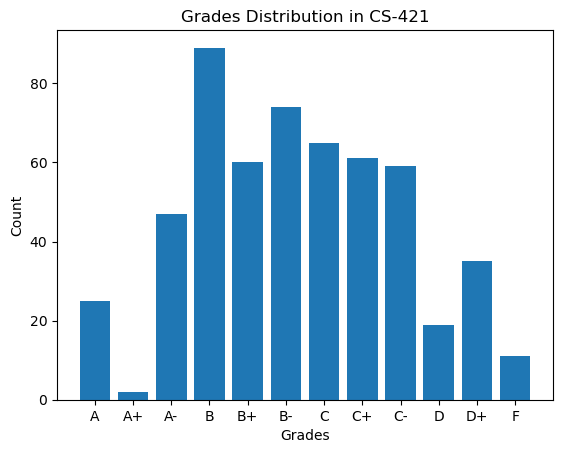

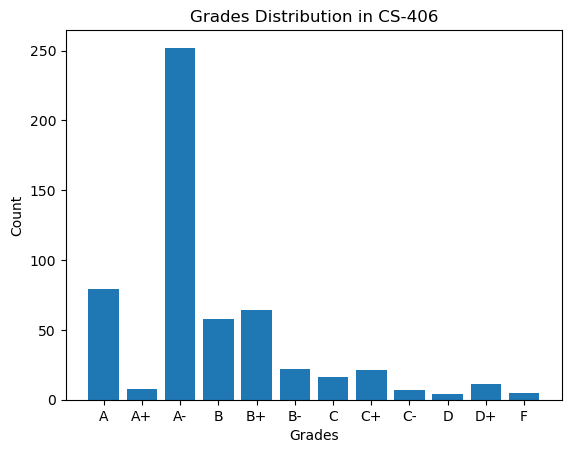

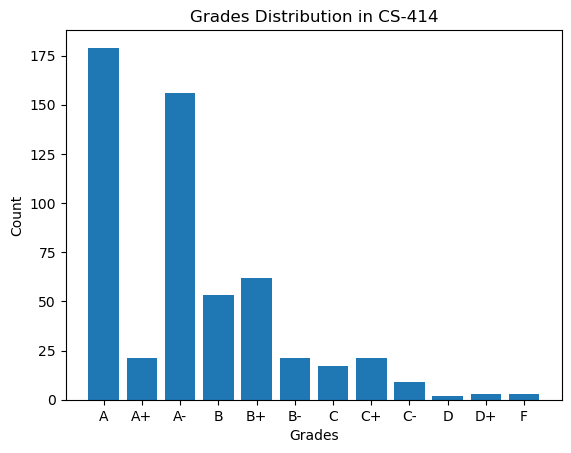

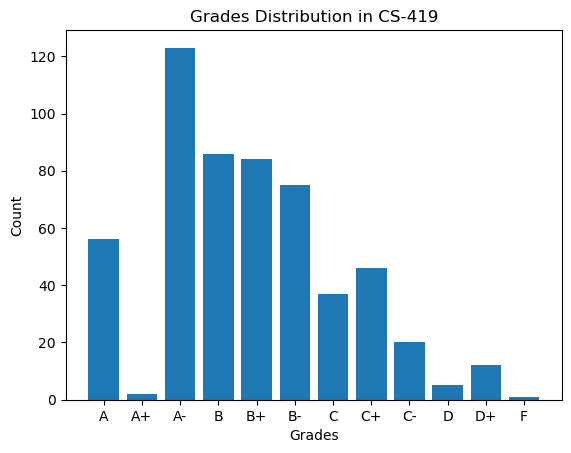

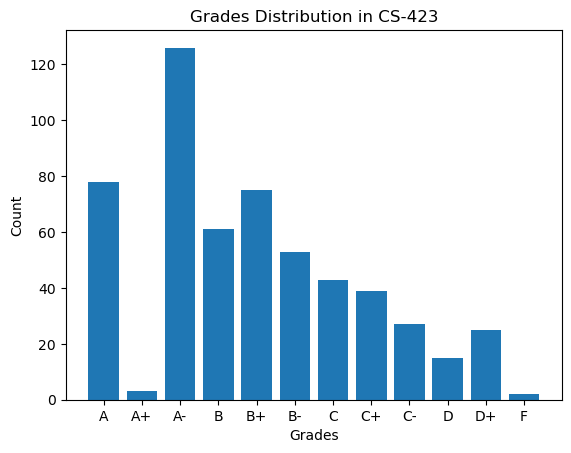

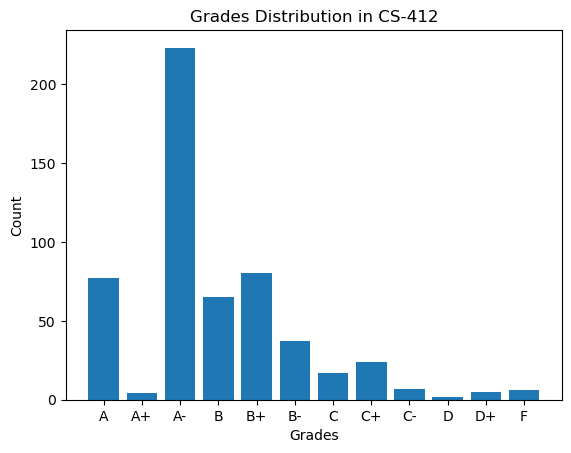

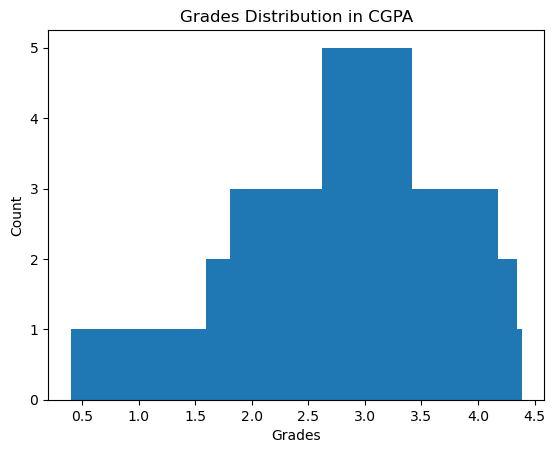

In [23]:
# Bar Chart for grades distribution in each subject
subjects = df.columns  
for subject in subjects:
    grades_count = df[subject].value_counts().sort_index()
    plt.bar(grades_count.index, grades_count.values)
    plt.xlabel('Grades')
    plt.ylabel('Count')
    plt.title(f'Grades Distribution in {subject}')
    plt.show()

### Dropping Unnecessary column

In [24]:
df = df.drop('Seat No.', axis=1)

### Encoding Categorical Values

In [25]:
# Define a dictionary to map letter grades to numerical values
grade_mapping = {
    'A+': 4.0,
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.4,
    'B': 3.0,
    'B-': 2.7,
    'C+': 2.4,
    'C': 2.0,
    'C-': 1.7,
    'D+': 1.4,
    'D': 1.0,
    'F': 0.0
}

# Use the replace method to map grades to numerical values for all columns
df = df.replace(grade_mapping)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  547 non-null    float64
 1   HS-101  547 non-null    float64
 2   CY-105  547 non-null    float64
 3   HS-105  547 non-null    float64
 4   MT-111  547 non-null    float64
 5   CS-105  547 non-null    float64
 6   CS-106  547 non-null    float64
 7   EL-102  547 non-null    float64
 8   EE-119  547 non-null    float64
 9   ME-107  547 non-null    float64
 10  CS-107  547 non-null    float64
 11  HS-205  547 non-null    float64
 12  MT-222  547 non-null    float64
 13  EE-222  547 non-null    float64
 14  MT-224  547 non-null    float64
 15  CS-210  547 non-null    float64
 16  CS-211  547 non-null    float64
 17  CS-203  547 non-null    float64
 18  CS-214  547 non-null    float64
 19  EE-217  547 non-null    float64
 20  CS-212  547 non-null    float64
 21  CS-215  547 non-null    float64
 22  MT

Observations

We have dropped "Seat no." from the dataframe as it wont help us in anyway to predict grades

We have encoded categorical values to numerical values

Now you can clear see that all columns has float values

No missing values in our dataframe as count of all the columns are 547

Memory usage is 179.6KB

In [28]:
#Statistical summary
df.describe()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3.067642,2.657952,3.310055,2.916636,3.047166,3.366728,3.000914,3.019927,3.060878,2.750640,...,2.976234,2.744424,3.140402,2.554662,3.373126,3.491042,3.059232,3.010603,3.342779,2.995388
std,0.936537,0.898506,0.873265,0.988782,0.896047,0.765265,0.827071,0.930312,0.797366,0.995601,...,1.012822,0.845166,0.854419,0.865577,0.704635,0.661342,0.720730,0.860316,0.682592,0.587388
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.700000,2.000000,3.000000,2.000000,2.400000,3.000000,2.700000,2.400000,2.550000,2.000000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.400000,2.700000,2.400000,3.000000,2.587500
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,3.000000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.058000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.474000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

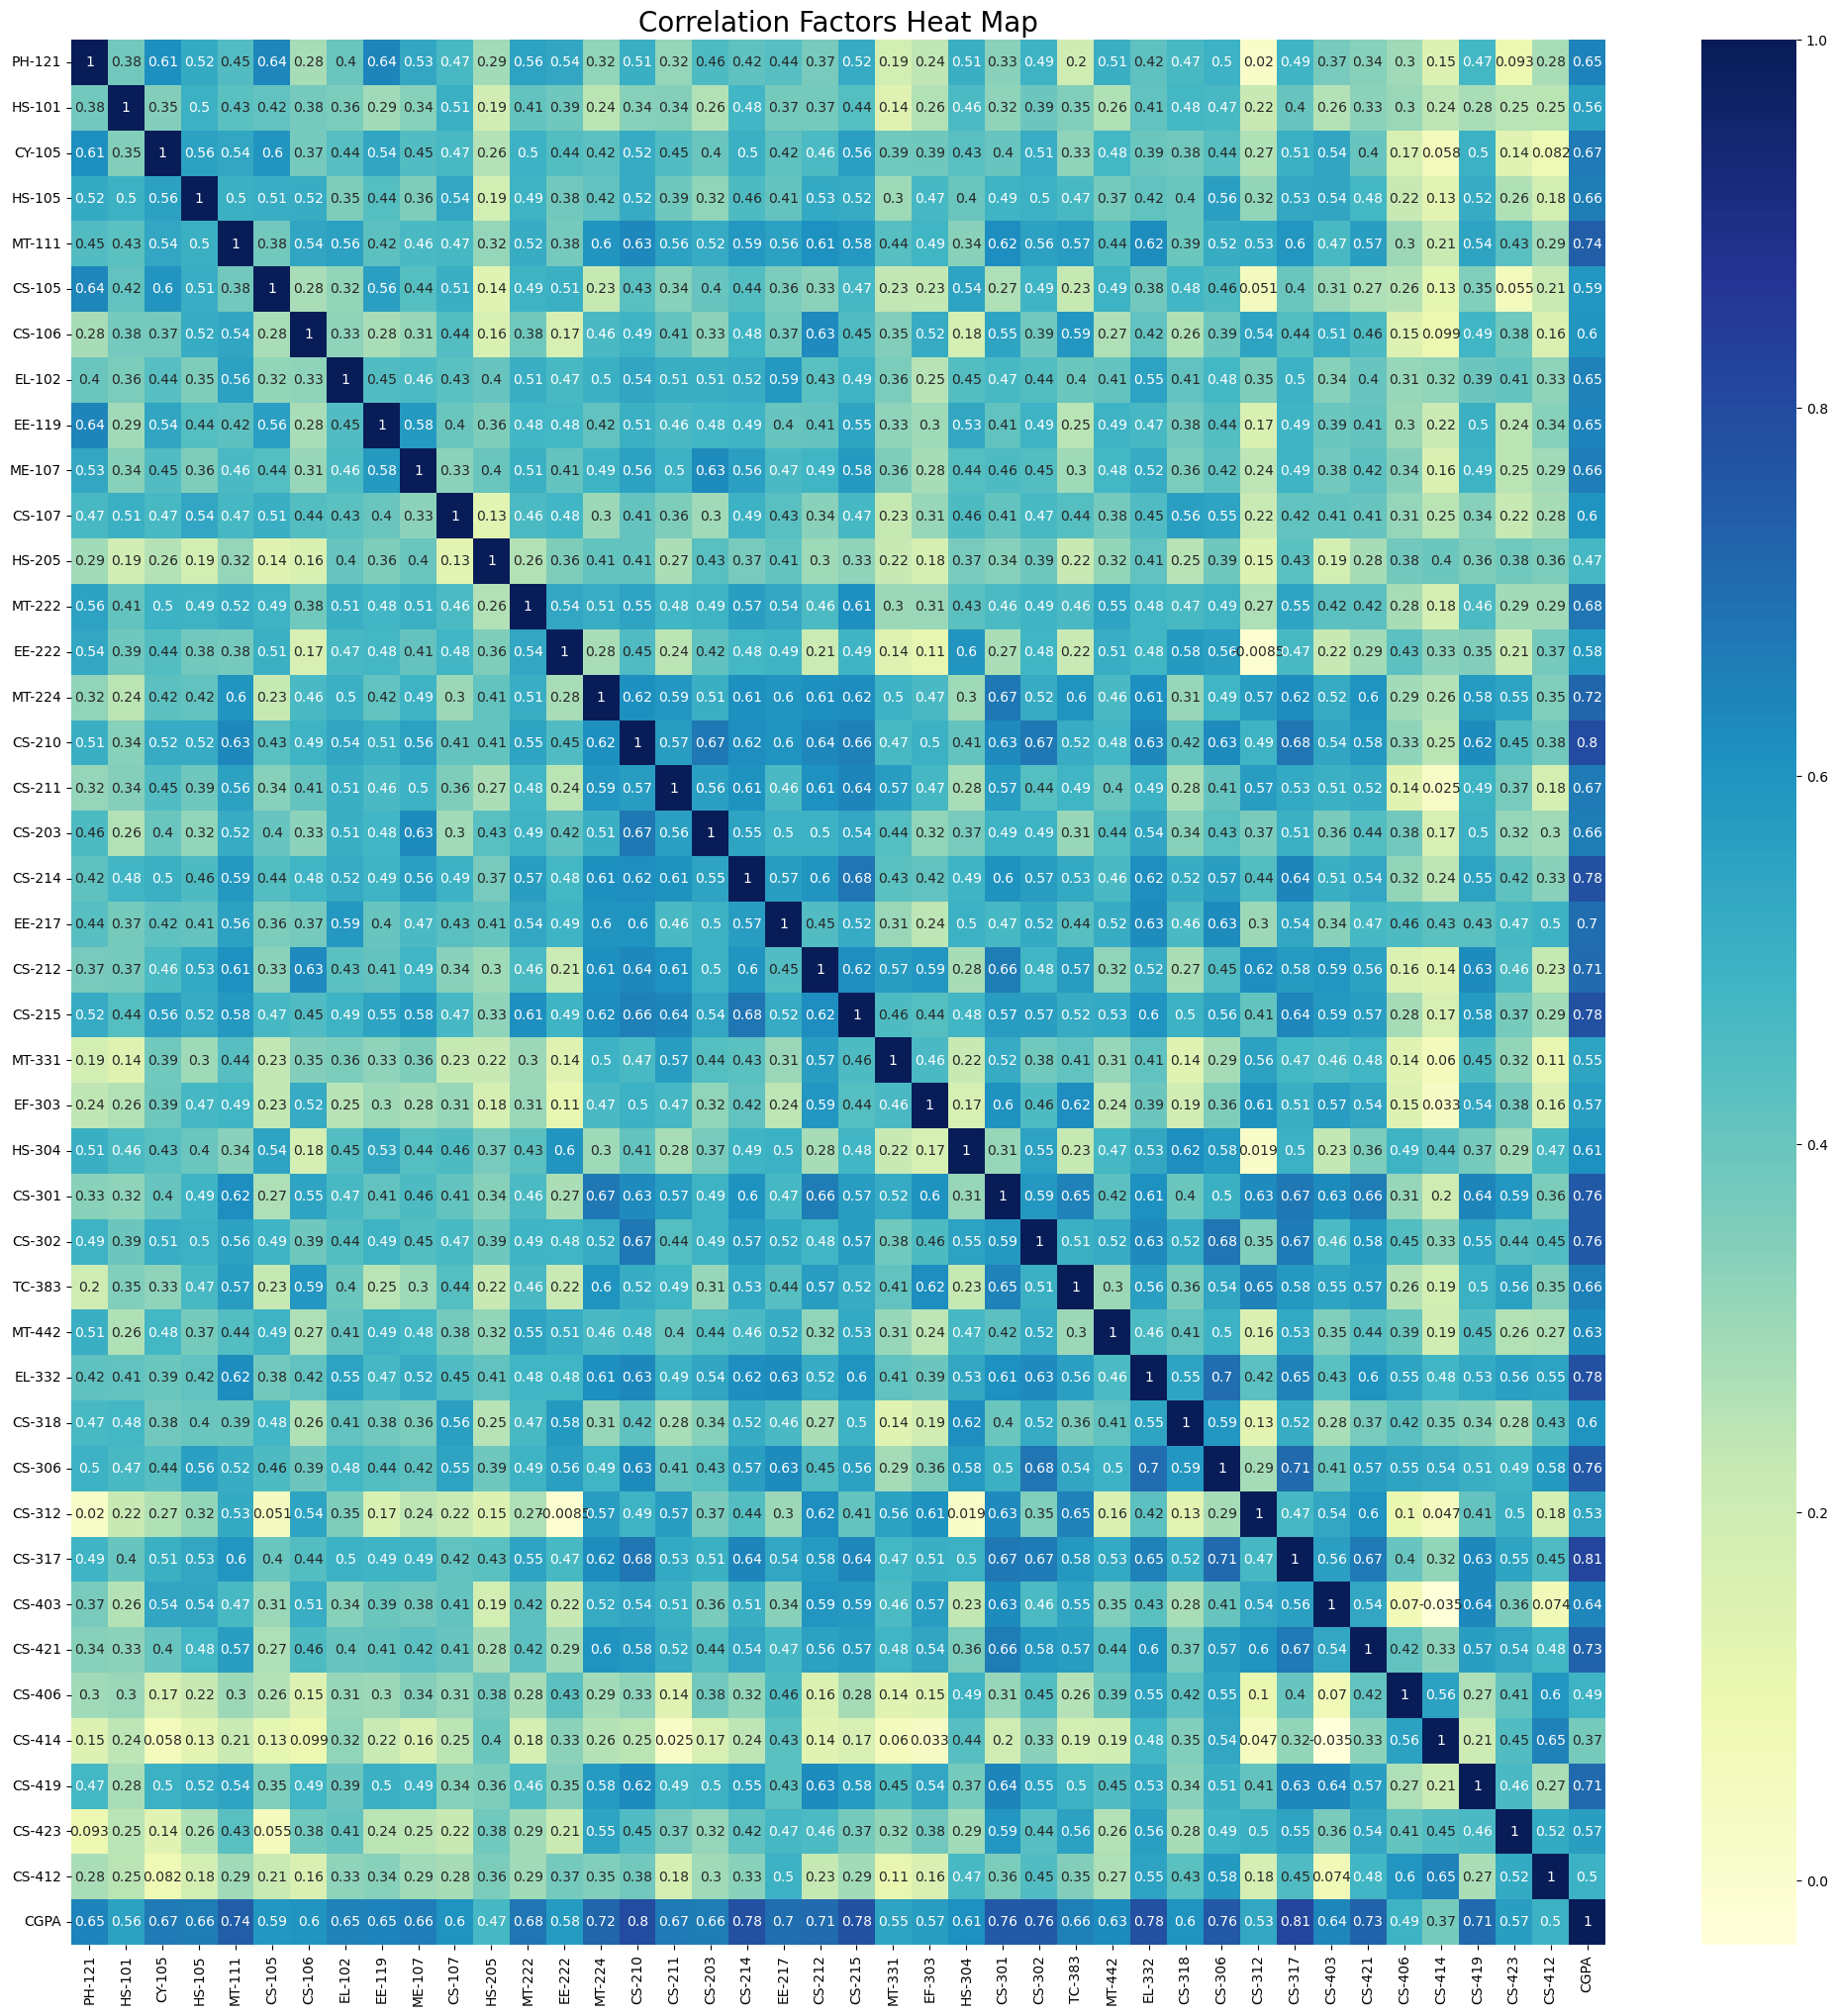

In [29]:
# visualization of correlation metrix
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

In [30]:
# correlation with label
correlation = df.corr()['CGPA'].drop('CGPA')

# Display the correlation values
print(correlation)

PH-121    0.645401
HS-101    0.556404
CY-105    0.669354
HS-105    0.660944
MT-111    0.738479
CS-105    0.588444
CS-106    0.597217
EL-102    0.651206
EE-119    0.647128
ME-107    0.659035
CS-107    0.601477
HS-205    0.470703
MT-222    0.680591
EE-222    0.577960
MT-224    0.722883
CS-210    0.799214
CS-211    0.672404
CS-203    0.662619
CS-214    0.782109
EE-217    0.699407
CS-212    0.706259
CS-215    0.780897
MT-331    0.550261
EF-303    0.568559
HS-304    0.608500
CS-301    0.755949
CS-302    0.756661
TC-383    0.655092
MT-442    0.626249
EL-332    0.784013
CS-318    0.603264
CS-306    0.758919
CS-312    0.534566
CS-317    0.814143
CS-403    0.639654
CS-421    0.728702
CS-406    0.494329
CS-414    0.370553
CS-419    0.711185
CS-423    0.565454
CS-412    0.495348
Name: CGPA, dtype: float64


Observations:
    
We can clearly visualize that all the columns are highly correlated to each other

### Data Spliting

In [31]:
X = df.drop('CGPA', axis=1) # List of all features
y = df['CGPA'] # Data of our label

In [32]:
X.shape

(547, 41)

In [33]:
y.shape

(547,)

Observations:
    
we have splitted the data into features and label.

Now we have 41 features with 547 observations.

As we y is our target it has only 574 observations

### Feature Scaling

In [34]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,-0.392914,-1.401331,-1.845407,-0.927884,-1.504832,-2.572347,-2.421491,-1.420098,-0.453001,-1.056248,...,-1.112315,-1.261231,-1.236894,-1.687370,-0.988294,0.464315,0.770288,-1.887636,-0.012336,0.523809
1,0.996450,-1.846922,-2.189260,-1.940155,-0.387797,-1.787588,-2.421491,1.054452,-2.084861,-1.759984,...,-2.242188,-1.557704,-2.065892,-1.335933,-1.797744,0.464315,-1.197211,-1.471010,-1.175764,-0.502632
2,0.996450,0.381033,0.790799,-0.219295,0.394128,0.828278,-0.364164,0.408917,0.802276,0.954427,...,0.808468,0.023487,0.302674,1.006982,-0.641387,0.890457,0.770288,1.306493,0.802063,0.963713
3,-2.209774,-0.287353,-2.189260,-1.940155,-2.286756,0.435898,-1.937414,-1.420098,-2.586972,-0.352511,...,-1.451277,-1.557704,-0.881609,-2.038807,-0.988294,-0.956157,-0.743173,-0.915510,-0.710393,-1.382438
4,0.675827,1.160817,0.446946,0.489295,1.064348,0.828278,0.846029,0.408917,1.178859,0.954427,...,0.808468,-0.272987,0.776387,0.304108,0.168063,0.464315,0.770288,0.889867,0.802063,0.963713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,-0.072291,1.495011,0.790799,0.792976,1.064348,0.828278,0.846029,0.731685,1.178859,0.652826,...,0.469506,0.715258,1.131672,1.006982,1.671327,0.890457,-0.137788,0.473242,-0.012336,0.963713
543,0.996450,1.495011,0.790799,1.096658,1.064348,0.828278,1.209086,0.731685,1.178859,1.256029,...,0.808468,0.418784,0.776387,1.006982,1.671327,0.464315,-0.743173,0.889867,-1.175764,0.523809
544,-0.072291,1.495011,0.446946,0.489295,1.064348,0.828278,1.209086,1.054452,1.178859,0.250691,...,0.469506,0.715258,0.302674,1.006982,0.977513,0.890457,-2.256633,0.473242,0.802063,0.523809
545,0.996450,0.826624,-2.647731,1.096658,-2.286756,-2.572347,-0.364164,-1.420098,-0.453001,-1.056248,...,0.469506,-1.953002,0.302674,-0.164475,-0.988294,-3.370961,-2.256633,-0.082259,-0.361364,-1.968976


### Checking Best Random State

In [35]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9875788176922384 on Random_state 46


### Train_ Test_Split

In [36]:
x_train,x_test,y_train,y_test= train_test_split(X,y, test_size =0.2, random_state= maxRS)

### Model Training & Testing

### LinearRegression

In [37]:
LR = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(LR, x_train, y_train, cv=5, scoring='r2')

# Fit the model on the entire training set
LR.fit(x_train, y_train)

# Predict on the test set
y_pred = LR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


R2 Score: 0.9884894119471499
MAE: 0.0528766977872478
Cross-Validation Scores: [0.98972109 0.97168207 0.77195307 0.97381632 0.97827864]
Mean Cross-Validation Score: 0.9370902366556093


### Ridge Regression

In [38]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Ridge regression model
R = Ridge()

# Perform grid search with cross-validation
grid_search = GridSearchCV(R, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_R = grid_search.best_estimator_
best_R.fit(x_train, y_train)

# Predict on the test set
y_pred = best_R.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_R, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


Best Parameters: {'alpha': 100}
R2 Score: 0.992129009223353
MAE: 0.04087843834677465
Cross-Validation Scores: [0.99406179 0.98239821 0.78052778 0.98514285 0.99237896]
Mean Cross-Validation Score: 0.9469019170790579


### Lasso Regression

In [39]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10, 100]}  # Example parameter values, you can modify it

# Create the Lasso regression model
L = Lasso()

# Perform grid search with cross-validation
grid_search = GridSearchCV(L, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_L = grid_search.best_estimator_
best_L.fit(x_train, y_train)

# Predict on the test set
y_pred = best_L.predict(x_test)


# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_L, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


Best Parameters: {'alpha': 0.1}
R2 Score: 0.8979205182363923
MAE: 0.16203976784773086
Cross-Validation Scores: [0.90262411 0.88373868 0.72248202 0.87741962 0.90261066]
Mean Cross-Validation Score: 0.8577750169235688


### Decision Tree Regressor

In [40]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the Decision Tree Regressor model
DTR = DecisionTreeRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(DTR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_DTR = grid_search.best_estimator_
best_DTR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_DTR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_DTR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
R2 Score: 0.7502180847002166
MAE: 0.23123077200577202
Cross-Validation Scores: [0.86777796 0.76912588 0.62377038 0.81675028 0.72225964]
Mean Cross-Validation Score: 0.7599368291881416


### Random Forest Regressor

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Random Forest Regressor model
RFR = RandomForestRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(RFR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_RFR = grid_search.best_estimator_
best_RFR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_RFR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_RFR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.9464357936935816
MAE: 0.09128718181818186
Cross-Validation Scores: [0.96662679 0.94977548 0.73425568 0.96209351 0.96912407]
Mean Cross-Validation Score: 0.9163751059395968


### Extra Tree Regressor

In [42]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Extra Trees Regressor model
ETR = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(ETR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_ETR = grid_search.best_estimator_
best_ETR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_ETR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_ETR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.954254332074021
MAE: 0.08303002651515148
Cross-Validation Scores: [0.97323021 0.9572981  0.74639968 0.97123296 0.97313417]
Mean Cross-Validation Score: 0.9242590217298348


### Ada Boost Regressor

In [43]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create the Gradient Boosting Regressor model
GBR = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(GBR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_GBR = grid_search.best_estimator_
best_GBR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_GBR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_GBR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
R2 Score: 0.9625498360202717
MAE: 0.07664528346260074
Cross-Validation Scores: [0.97255799 0.96437857 0.72761168 0.96750089 0.96171273]
Mean Cross-Validation Score: 0.9187523714666455


### XGB Regressor

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the XGBoost Regressor model
XGBR = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(XGBR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

# Print the best parameters
print('Best Parameters:', grid_search.best_params_)

# Fit the model with the best parameters on the entire training set
best_XGBR = grid_search.best_estimator_
best_XGBR.fit(x_train, y_train)

# Predict on the test set
y_pred = best_XGBR.predict(x_test)

# Print evaluation metrics
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_XGBR, x_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print('Cross-Validation Scores:', cv_scores)
print('Mean Cross-Validation Score:', cv_scores.mean())

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
R2 Score: 0.9680914803790569
MAE: 0.06646585891897029
Cross-Validation Scores: [0.97257635 0.947726   0.75845435 0.96550984 0.96851745]
Mean Cross-Validation Score: 0.9225568005070667


### Saving The Model

In [45]:
filename = 'LinearRegression.pkl'
pickle.dump(LR, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

In [46]:
with open('LinearRegression.pkl', 'rb') as file:
    data = pickle.load(file)

In [47]:
data.predict(X_test)

array([3.77068565, 3.75407909, 2.54638351, 2.09360857, 3.79929245,
       2.94961198, 2.09316688, 3.23065178, 2.9072488 , 2.03583939,
       3.62151759, 3.01708529, 3.54714463, 2.80159418, 3.42954448,
       3.7285125 , 3.14013385, 3.94642353, 2.82604138, 2.07526458,
       2.63434344, 3.08805893, 2.81268765, 3.55520011, 3.48156609,
       3.23621862, 3.20573641, 1.97585951, 3.1965465 , 3.19690244,
       3.32649891, 3.08564728, 2.35530664, 2.5222813 , 3.37919198,
       3.70367376, 3.51162938, 2.74767634, 1.89004226, 2.75939195,
       3.3905639 , 2.91442493, 2.2607173 , 2.79347019, 3.59859323,
       2.64477587, 2.11762028, 2.91221773, 3.36521106, 3.34981952,
       3.70027887, 3.21621348, 3.71687807, 3.43379881, 2.05197933,
       2.70001763, 2.80321349, 3.68061392, 2.75416651, 3.44985303,
       2.01609771, 2.49585468, 3.22180723, 2.66438405, 3.28641425,
       2.69450312, 3.18749046, 2.69617306, 3.7197727 , 2.79241047,
       2.68502294, 2.6333894 , 2.31021338, 3.85124306, 2.21982